In [1]:
import sys
sys.path.append('../alma-calibrator/src/utils/')

from galenv import *

from astroquery.irsa import Irsa

%matplotlib inline

In [2]:
def plot_cone(coord, theta, res, xSize=7.5, ySize=7.5, title='', show=True, savefig=False, imgname="plot.png"):
        '''Only cone
        coord = astropy coordinates
        theta = Cone angle
        res = result catalog
        '''
        ra = coord.ra.value
        dec = coord.dec.value

        fig = plt.figure(figsize=(xSize, ySize))        
        gs = gridspec.GridSpec(1, 1)
        
        ax = plt.subplot(gs[0])
        # ax.axis('equal')
        limangle = 1.5*theta
        ax.set_xlim((ra-limangle, ra+limangle))
        ax.set_ylim((dec-limangle, dec+limangle))
        
        # Central position/object
        ax.plot(ra, dec, 'ro', alpha=0.5)
        
        # Catalog object
        ax.plot(res['ra'], res['dec'], 'k.')
        
        plt.gca().invert_xaxis() # RA from E to W
        ax.set_xlabel('RA (deg)')
        ax.set_ylabel('DEC (deg)')
        plt.title(title)

        # Circle
        # it is wrong if I draw a circle around (ra, dec) with radius theta
        # due to small circle in celestial sphere for DEC
        circle = plt.Circle((ra, dec), theta, fc='none', ec='black')
        ax.add_artist(circle)
        
        fig.tight_layout()

        if savefig:
            plt.savefig(imgname)

        if show:
            plt.show()

        plt.close()

In [3]:
ga = Galenv()

In [4]:
objname = "3C 279"
tangential_dist = 5.0 # Mpc

In [5]:
z, v0, ra, dec = ga.queryobject_byname(objname)
print(z, v0, ra, dec)

dA, theta = ga.calc_dA_theta(z, tangential_dist)
print(dA, theta)

0.5362 160749.0 194.04653 -5.78931
1344.817110605312 0.21302442934895835


In [6]:
result = Irsa.query_region(objname, catalog="fp_xsc", spatial="Cone", radius= theta * u.deg)

result

designation,ra,dec,clon,clat,sup_ra,sup_dec,glon,glat,density,r_k20fe,j_m_k20fe,j_msig_k20fe,j_flg_k20fe,h_m_k20fe,h_msig_k20fe,h_flg_k20fe,k_m_k20fe,k_msig_k20fe,k_flg_k20fe,k_ba,k_phi,sup_ba,sup_phi,r_ext,j_m_ext,h_m_ext,h_msig_ext,k_m_ext,k_msig_ext,cc_flg,dist,angle,id
,deg,deg,,,deg,deg,deg,deg,,arcs,mag,mag,,mag,mag,,mag,mag,,,deg,,deg,arcs,mag,mag,mag,mag,mag,,arcs,deg,
object,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,int32,float64,float64,int32,float64,int32,float64,int32,float64,float64,float64,float64,float64,float64,object,float64,float64,object
12555264-0549194,193.969,-5.822,12h55m52.65s,-05d49m19.46s,193.969269,-5.822131,304.961,57.032,2.75,5.5,14.712,0.064,0,14.028,0.078,0,13.778,0.121,0,0.6,35,1.0,90,10.48,14.365,13.641,0.097,13.614,0.191,0,300.498795,246.887235,0
12563258-0545041,194.136,-5.751,12h56m32.59s,-05d45m04.10s,194.135757,-5.751063,305.27,57.097,2.68,5.2,15.265,0.119,0,14.636,0.161,0,13.881,0.16,0,1.0,90,1.0,90,10.3,15.108,14.38,0.235,13.654,0.241,0,347.931335,66.742259,1


In [7]:
coord = coordinates.SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg))

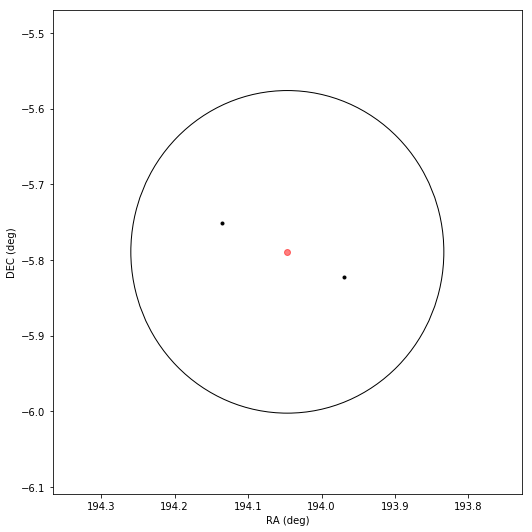

In [8]:
plot_cone(coord, theta, result)